# Import Required mudules

In [8]:
import netCDF4 as nc
import xarray as xr
from qdwb.evapotranspiration.et import ReferenceEvapotranspiration
import pandas as pd
import numpy as np
from qdwb.evapotranspiration.asset import *
import qdwb.evapotranspiration.convert as convert

In [14]:
def extract_data(nc_file, variable, lat, lon):
    with xr.open_dataset(nc_file) as xr_nc:
        tmp = xr_nc.sel(
            lon=lon,
            lat=lat,
            method='nearest'
        )
        result = tmp[variable].values
    return result[0]


def clip_ncdf(nc_file, variable, lat_min, lat_max, lon_min, lon_max):
    # TODO: Check if the lat/lon are in the correct order 
    with xr.open_dataset(nc_file) as xr_nc:
        tmp = xr_nc.sel(
            lat = slice(lat_max, lat_min),
            lon = slice(lon_min, lon_max),
        )
    return tmp


In [11]:
import netCDF4 as nc
import xarray as xr

PATH_DATA_FOLDER = "/mnt/c/Users/shirazipooya/Desktop/DataQDWB/"

tmin = xr.open_dataset(PATH_DATA_FOLDER + "Tmin_2022031.nc")
tmax = xr.open_dataset(PATH_DATA_FOLDER + "Tmax_2022031.nc")

def add(x , y):
    return x + y





In [4]:
tmin

<xarray.Dataset>
Dimensions:          (lon: 3600, lat: 1800, time: 1)
Coordinates:
  * lon              (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat              (lat) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time             (time) datetime64[ns] 2022-01-31
Data variables:
    air_temperature  (time, lat, lon) float32 ...
Attributes:
    history:          Created on 2022-02-06 07:16
    input_data_hash:  a1123a6e0d2788e1883ec8f01cc52110d92449cef4cf1591984fe91...

In [1]:
import xarray as xr
xr.tutorial.open_dataset("rasm").load()

<xarray.Dataset>
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

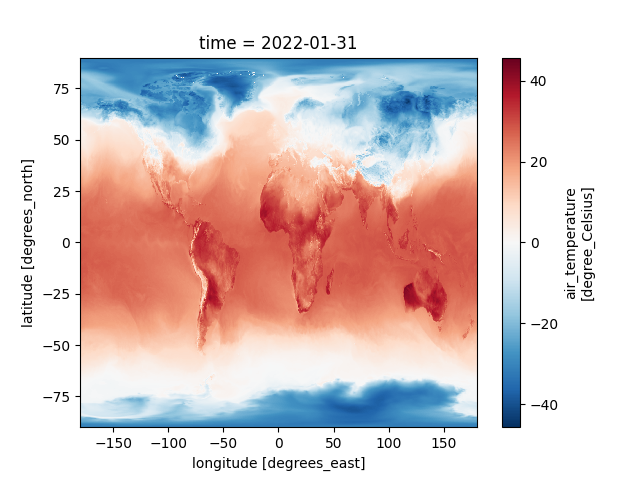

In [14]:
%matplotlib inline
%matplotlib widget
import matplotlib
from matplotlib import pyplot as plt
tmax.air_temperature.plot()

# Prepare Data

In [4]:
PATH_DATA_FOLDER = "/mnt/c/Users/shirazipooya/Desktop/DataQDWB/"


tmin = extract_data(
    nc_file=PATH_DATA_FOLDER + "tmin_2022031.nc",
    variable="air_temperature",
    lat=36.31, 
    lon=59.59
)

tmax = extract_data(
    nc_file=PATH_DATA_FOLDER + "Tmax_2022031.nc",
    variable="air_temperature",
    lat=36.31, 
    lon=59.59
)

tmean = extract_data(
    nc_file=PATH_DATA_FOLDER + "Temp_2022031.nc",
    variable="air_temperature",
    lat=36.31, 
    lon=59.59
)

v_tmax = clip_ncdf(
    nc_file = PATH_DATA_FOLDER + "Tmax_2022031.nc",
    variable="air_temperature",
    lat_min=36.4,
    lat_max=36.6,
    lon_min=59.4,
    lon_max=59.6
)

v_tmean = clip_ncdf(
    nc_file = PATH_DATA_FOLDER + "Temp_2022031.nc",
    variable="air_temperature",
    lat_min=36.4,
    lat_max=36.6,
    lon_min=59.4,
    lon_max=59.6
)

In [23]:
def calculate_array(
    lat:list,
    lon:list,
    func_name: str,
    shape: tuple,
    day : int = 31,
):
    points = []
    for x in lon:
        for y in lat:
            points.append((x,y))
            
    if func_name=="lat":
        points = [convert.convert_degrees2radians(degrees = i[1]) for i in points]
    elif func_name=="solar_declination":
        points = [solar_declination(julian_date = day) for i in points]
    elif func_name=="inverse_relative_distance_earth_sun":
        points = [inverse_relative_distance_earth_sun(julian_date = day) for i in points]
    else : 
        raise ValueError("func_name is not valid")
    
    points = np.asarray(points, dtype=np.float32)
    points_reshaped = np.reshape(points, shape)
    
    return points_reshaped



In [34]:
lon_list = v_tmean['lon'].values.tolist()
lat_list = v_tmean['lat'].values.tolist()
calculate_array(
    lat = lat_list,
    lon = lon_list,
    func_name = 'inverse_relative_distance_earth_sun',
    shape = (2,2,1)
)
# func_names = ['lat' , 'solar_declination', 'inverse_relative_distance_earth_sun']
# for func in func_names:
#     value_array = calculate_array(
#                     lat = lat_list,
#                     lon = lon_list,
#                     func_name = func,
#                     shape = (2,2,1)
#                     )
#     v_tmean.assign(func=(['time', 'lat', 'lon'],value_array))



    

array([[[1.0284117],
        [1.0284117]],

       [[1.0284117],
        [1.0284117]]], dtype=float32)

In [55]:
array1 = np.array([[[1,2], [3,4]]])


array_dr = np.array([[[1,2], [3,4]]])
ds_array = v_tmean.assign(test1=(['time', 'lat', 'lon'],array_dr))

array_solar_declination = np.array([[[1,2], [3,4]]])
ds_array = ds_array.assign(test2=(['time', 'lat', 'lon'],array_solar_declination))

array_lat = np.array([[[1,2], [3,4]]])
ds_array = ds_array.assign(test3=(['time', 'lat', 'lon'],array_lat))

array_sunset_hour_angle = np.array([[[1,2], [3,4]]])
ds_array = ds_array.assign(test4=(['time', 'lat', 'lon'],array_sunset_hour_angle))

array_ra = np.array([[[1,2], [3,4]]])
ds_array = ds_array.assign(test5=(['time', 'lat', 'lon'],array_ra))


ds_array.assign(temperature_f= ds_array["test1"] - ds_array["test2"])




<xarray.Dataset>
Dimensions:          (lon: 2, lat: 2, time: 1)
Coordinates:
  * lon              (lon) float32 59.45 59.55
  * lat              (lat) float32 36.55 36.45
  * time             (time) datetime64[ns] 2022-01-31
Data variables:
    air_temperature  (time, lat, lon) float32 2.812 2.75 3.125 3.188
    test1            (time, lat, lon) int64 1 2 3 4
    test2            (time, lat, lon) int64 1 2 3 4
    test3            (time, lat, lon) int64 1 2 3 4
    test4            (time, lat, lon) int64 1 2 3 4
    test5            (time, lat, lon) int64 1 2 3 4
    temperature_f    (time, lat, lon) int64 0 0 0 0
Attributes:
    history:          Created on 2022-02-06 07:15
    input_data_hash:  a1123a6e0d2788e1883ec8f01cc52110d92449cef4cf1591984fe91...

In [ ]:
v_tmean

# calculate extraterrestrial_radiation

In [20]:

dr = inverse_relative_distance_earth_sun(julian_date = 31)
solar_declination = solar_declination(julian_date = 31)
lat = convert.convert_degrees2radians(degrees = 36.31)
sunset_hour_angle = sunset_hour_angle(latitude = lat, solar_declination = solar_declination)
ra = extraterrestrial_radiation(
    inverse_relative_distance_earth_sun = dr,
    sunset_hour_angle = sunset_hour_angle,
    latitude = lat,
    solar_declination = solar_declination
)

x.assign(temperature_f=x["temperature_c"] * 9 / 5 + 32)

    
    


# Calculate Evapotranspiration

In [21]:
# Hargreaves-Samani Method
ReferenceEvapotranspiration.hargreaves_samani(
    tmin=tmin, 
    tmean=tmean, 
    tmax=tmax, 
    ra=ra
)

3.3269984927681877